In [1]:
import json
import random
import sys

import numpy as np

sys.path.insert(1, '../../src')

from ce.algorithms.greedy_heuristics import random_solution
from ce.algorithms.local_search import iterated_local_search, multiple_start_local_search, two_edges_neighborhood
from ce.tsp import create_tsp, TSP
from ce.utils.experiments import experiment, quality_plots

# Multiple start local search and iterated local search

**Nina Zukowska 148278, Antoni Solarski 148270**

In [2]:
problem_instance_A_path = '../../data/TSPA.csv'
problem_instance_B_path = '../../data/TSPB.csv'
problem_instance_C_path = '../../data/TSPC.csv'
problem_instance_D_path = '../../data/TSPD.csv'

In [3]:
tspa = create_tsp(problem_instance_A_path)
tspb = create_tsp(problem_instance_B_path)
tspc = create_tsp(problem_instance_C_path)
tspd = create_tsp(problem_instance_D_path)

## Algorithms

---

### Multiple start local search

```python
def multiple_start_local_search(tsp: TSP, init_solutions: List[List[int]], neighborhood_fn):
    best_solution, best_solution_cost, total_iterations = None, 1e9, 0

    for init_solution in init_solutions:
        solution, iterations = steepest_local_search_cache(tsp, init_solution, neighborhood_fn)
        solution_cost = tsp.get_solution_cost(solution)
        if solution_cost < best_solution_cost:
            best_solution = solution
            best_solution_cost = solution_cost
        total_iterations += iterations

    return best_solution, total_iterations
```

---

### Iterated local search

```python
def iterated_local_search(tsp: TSP, init_solution: List[int], time_limit: float, neighborhood_fn):
    best_solution, best_solution_cost, total_iteration  = None, 1e9, 0
    solution = init_solution

    start_time = time.time()
    while time.time() - start_time < time_limit:
        solution, iterations = steepest_local_search_cache(tsp, solution, neighborhood_fn)
        solution_cost = tsp.get_solution_cost(solution)
        if solution_cost < best_solution_cost:
            best_solution = solution
            best_solution_cost = solution_cost
        total_iterations +=counter += 1
        solution = break_solution(solution, end(ls_counter)

    return best_solution, total_iterations
```

#### Breaking the local optimum

We randomly choose 20 consecutive nodes and replace them with randomly selected ones.

```python
def break_solution(solution: List[int], indexes: List[int], break_length=20) -> List[int]:
    start_index = np.random.randint(0, len(solution) - break_length)
    end_index = start_index + break_length

    outer_nodes = np.array(list(set(indexes) - set(solution[:start_index]) - set(solution[end_index:])))
    replacements = np.random.choice(outer_nodes, size=break_length, replace=False).tolist()

    return solution[:start_index] + replacements + solution[end_ndex:]

```

---

## Experiments

In [5]:
n_runs = 20
n_starts = 200
experiment_names = ["multiple start local search", "iterated local search"]

def msls_experiment_provider(tsp: TSP, random_inits):
    return lambda x: multiple_start_local_search(tsp, random_inits[x], two_edges_neighborhood)

def ils_experiment_provider(tsp: TSP, random_inits, ls_counter, time_limit):
    return lambda x: iterated_local_search(tsp, random_inits[x], time_limit, two_edges_neighborhood, ls_counter)

---

### Instance C

#### Multiple start local search

In [6]:
%%time
random.seed(13)
np.random.seed(13)
random_inits_msls_c = [[random_solution(tspc) for i in range(n_starts)] for j in range(n_runs)]

print("**************************************************************************************************************************")
msls_costs_c, msls_best_solution_c = experiment(n_runs, msls_experiment_provider(tspc, random_inits_msls_c), tspc.get_solution_cost)
print("**************************************************************************************************************************")

**************************************************************************************************************************
cost: 49247.3, (48758 - 49472)	|	iter: 26476.2, (26317 - 26705)	|	time: 91.8s, (89.7s - 102.1s)
**************************************************************************************************************************
CPU times: total: 31min 2s
Wall time: 31min 2s


---

#### Iterated local search

In [7]:
%%time
time_limit = 90.0
ls_counter = []

random.seed(13)
np.random.seed(13)
random_inits_ils_c = [i[0] for i in random_inits_msls_c]

print("**************************************************************************************************************************")
ils_costs_c, ils_best_solution_c = experiment(n_runs, ils_experiment_provider(tspc, random_inits_ils_c, ls_counter, time_limit), tspc.get_solution_cost)
print("**************************************************************************************************************************")

**************************************************************************************************************************
cost: 48831.7, (48305 - 49189)	|	iter: 30997.4, (29799 - 32030)	|	time: 90.1s, (90.0s - 90.2s)
**************************************************************************************************************************
CPU times: total: 30min 1s
Wall time: 30min 1s


In [8]:
print(f'number of basic local searches: {sum(ls_counter) / len(ls_counter):0.1f}, ({min(ls_counter):0.0f} - {max(ls_counter):0.0f})')

number of basic local searches: 816.2, (788 - 842)


---

In [9]:
results_list_c, best_solutions_c = [msls_costs_c, ils_costs_c], [msls_best_solution_c, ils_best_solution_c]

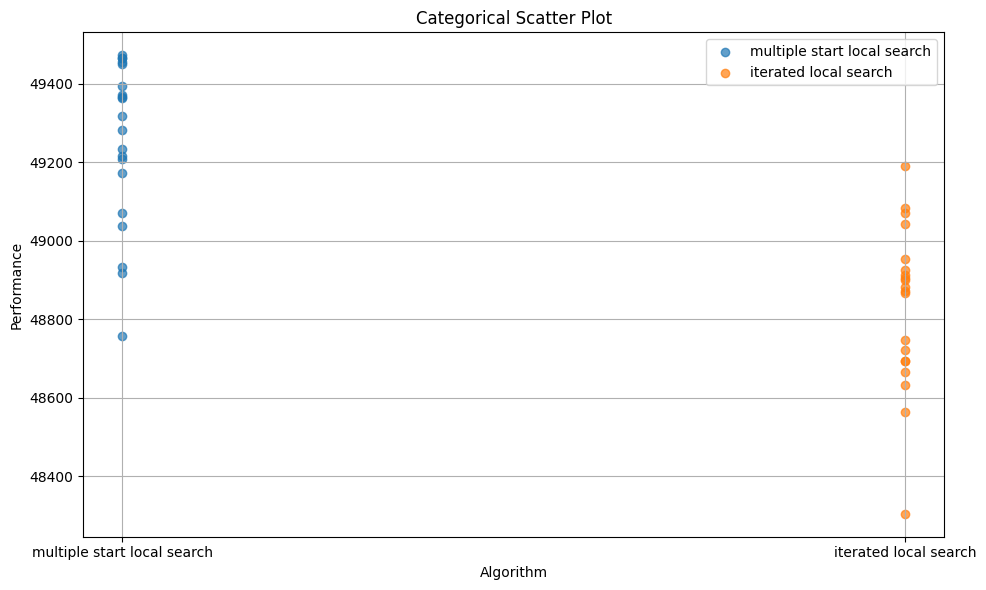

In [10]:
quality_plots(results_list_c, categories=experiment_names)

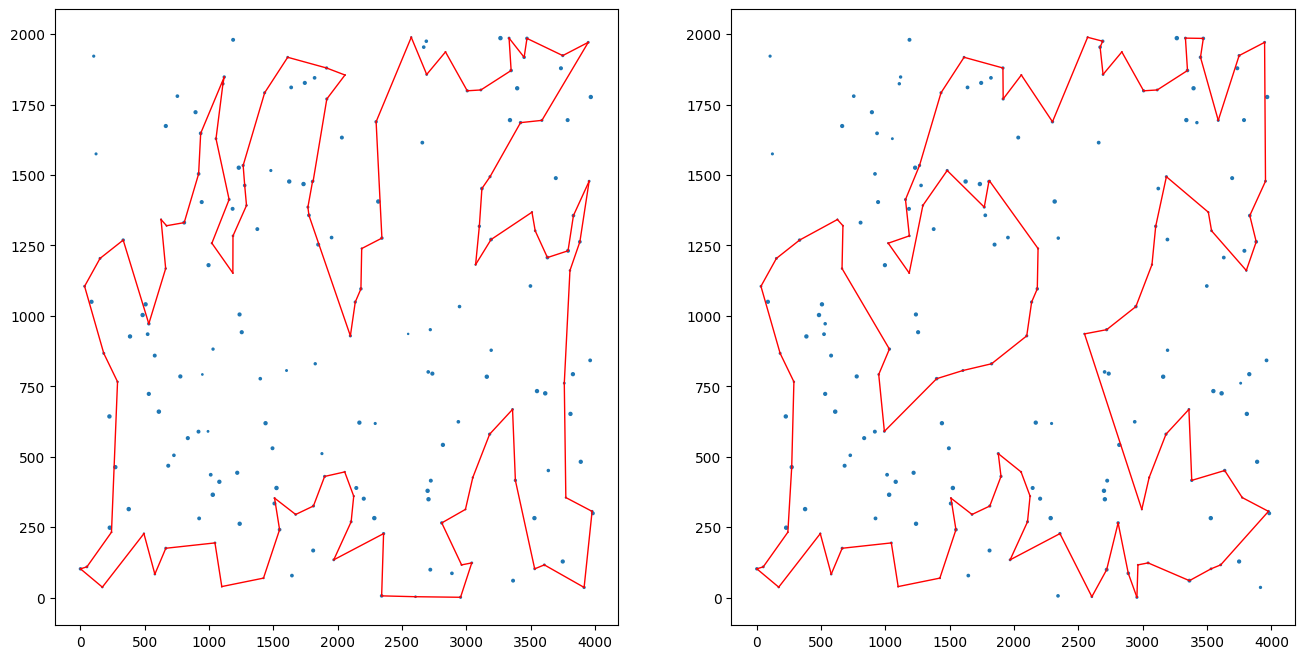

In [11]:
tspc.plot(best_solutions_c)

---

### Instance D

#### Multiple start local search

In [12]:
%%time
random.seed(13)
np.random.seed(13)
random_inits_msls_d = [[random_solution(tspd) for i in range(n_starts)] for j in range(n_runs)]

print("**************************************************************************************************************************")
msls_costs_d, msls_best_solution_d = experiment(n_runs, msls_experiment_provider(tspd, random_inits_msls_d), tspd.get_solution_cost)
print("**************************************************************************************************************************")

**************************************************************************************************************************
cost: 45610.2, (44915 - 46086)	|	iter: 26868.2, (26659 - 27089)	|	time: 92.2s, (90.9s - 93.1s)
**************************************************************************************************************************
CPU times: total: 31min 11s
Wall time: 31min 11s


---

#### Iterated local search

In [13]:
%%time
time_limit = 90.0
ls_counter = []

random.seed(13)
np.random.seed(13)
random_inits_ils_d = [i[0] for i in random_inits_msls_d]

print("**************************************************************************************************************************")
ils_costs_d, ils_best_solution_d = experiment(n_runs, ils_experiment_provider(tspd, random_inits_ils_d, ls_counter, time_limit), tspd.get_solution_cost)
print("**************************************************************************************************************************")

**************************************************************************************************************************
cost: 45152.4, (44487 - 45623)	|	iter: 30639.5, (29583 - 31228)	|	time: 90.0s, (90.0s - 90.1s)
**************************************************************************************************************************
CPU times: total: 30min
Wall time: 30min


In [14]:
print(f'number of basic local searches: {sum(ls_counter) / len(ls_counter):0.1f}, ({min(ls_counter):0.0f} - {max(ls_counter):0.0f})')

number of basic local searches: 800.8, (771 - 820)


---

In [15]:
results_list_d, best_solutions_d = [msls_costs_d, ils_costs_d], [msls_best_solution_d, ils_best_solution_d]

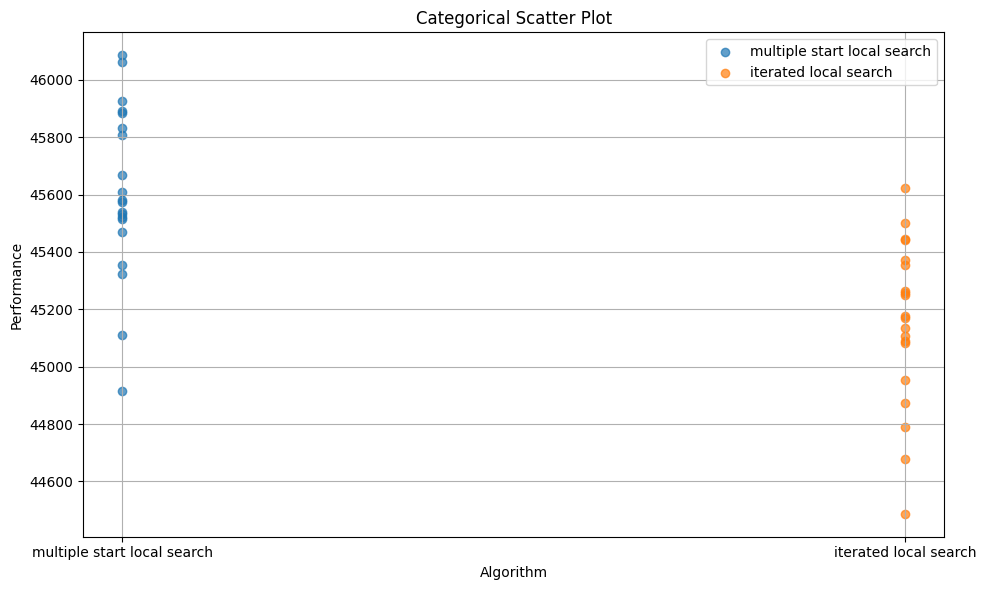

In [16]:
quality_plots(results_list_d, categories=experiment_names)

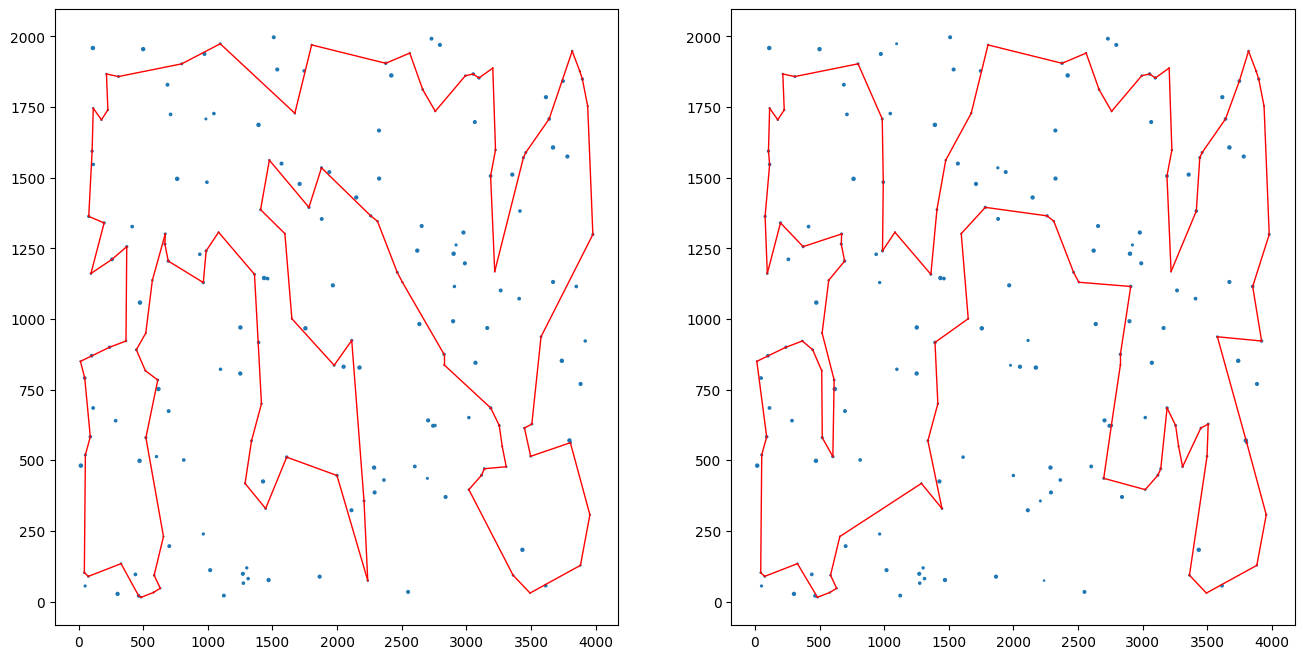

In [17]:
tspd.plot(best_solutions_d)

---

In [18]:
with open('results_c.json', 'w', encoding='utf-8') as f:
    json.dump(results_list_c, f, ensure_ascii=False, indent=4)
with open('best_solutions_c.json', 'w', encoding='utf-8') as f:
    json.dump(best_solutions_c, f, ensure_ascii=False, indent=4)

In [19]:
with open('results_d.json', 'w', encoding='utf-8') as f:
    json.dump(results_list_d, f, ensure_ascii=False, indent=4)
with open('best_solutions_d.json', 'w', encoding='utf-8') as f:
    json.dump(best_solutions_d, f, ensure_ascii=False, indent=4)

## Conclusions

For all experiments, a local search with using cost deltas from previous runs was used.

The results are in line with expectations. The iterated local search outperformed the multiple-start one given the same time of execution on both C and D problem instances.

Given that the method used to 'break the solution' in ILS was very primitive (removing 20 consecutive nodes from the solution and replacing them with random ones), it's clear that ILS is a ready-to-go improved version of MSLS that doesn't require much additional implementation effort.